# Insight into the RounD dataset

In [1]:
import json
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
configs = json.load(open("../data/configs/rounD.config","r"))
map_list = list(configs.keys())

## Duration of each track file

In [4]:
def duration(map_config):
    print("Map: "+map_config["map_name"])
    print("{:<15} {:<10}".format("Track file","Duration"))
    for file_id in map_config["track_files"]:
        df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
        print("{:<20} {:<10}".format(file_id, max(df["frame"]-min(df["frame"]))))

In [5]:
duration(configs[map_list[0]])

Map: R_rounD_0_DEU
Track file      Duration  
0                    10286     


In [6]:
duration(configs[map_list[1]])

Map: R_rounD_1_DEU
Track file      Duration  
1                    10581     


In [7]:
duration(configs[map_list[2]])

Map: R_rounD_2_DEU
Track file      Duration  
2                    5496      
3                    10732     
4                    11587     
5                    11014     
6                    12495     
7                    12163     
8                    10009     
9                    10698     
10                   11490     
11                   10392     
12                   10746     
13                   5770      
14                   11438     
15                   4409      
16                   5680      
17                   10367     
18                   11047     
19                   7737      
20                   11422     
21                   11066     
22                   11734     
23                   9486      


## Trajectory Visualization

In [4]:
def trajectory_vis(map_config, type, all_files=True):
    file_list = map_config["track_files"] if all_files else [map_config["track_files"][0]]
    for file_id in file_list:
        df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
        df_sub = df[df["type"]==type]
        plt.scatter(df_sub["x"], df_sub["y"], s=0.01)
    fig = plt.gcf()
    fig.set_size_inches((8,6))
    plt.set_cmap("Set2")
    plt.show()

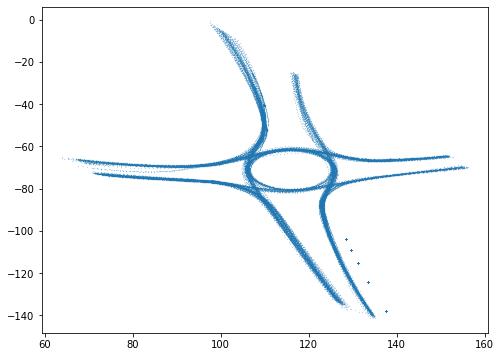

In [5]:
trajectory_vis(configs[map_list[0]], "car")

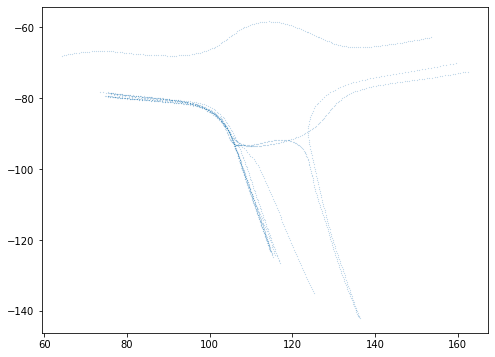

In [6]:
trajectory_vis(configs[map_list[0]], "bicycle")

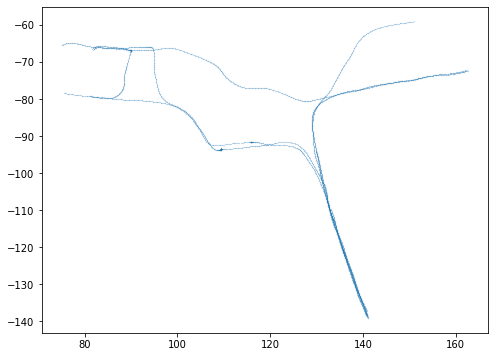

In [7]:
trajectory_vis(configs[map_list[0]], "pedestrian")

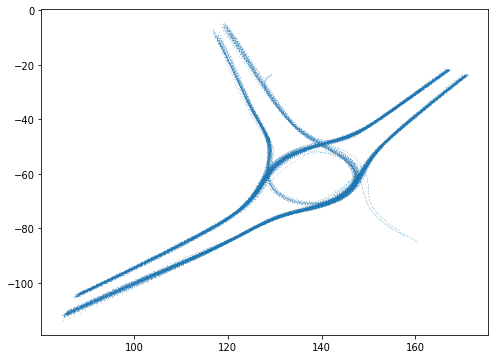

In [8]:
trajectory_vis(configs[map_list[1]], "car")

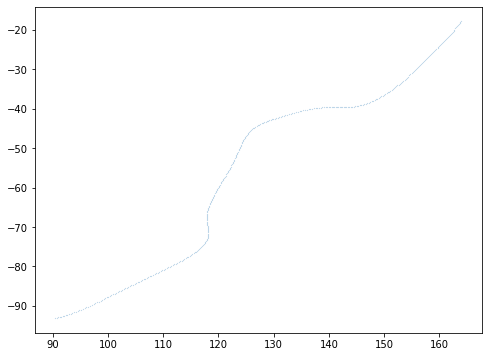

In [9]:
trajectory_vis(configs[map_list[1]], "bicycle")

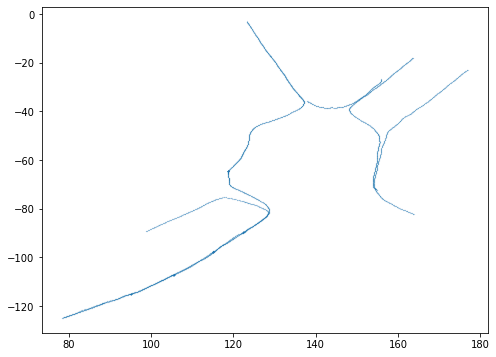

In [10]:
trajectory_vis(configs[map_list[1]], "pedestrian")

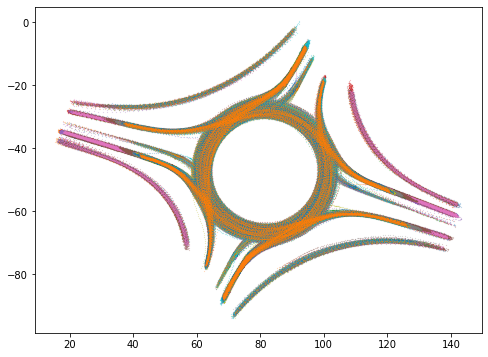

In [11]:
trajectory_vis(configs[map_list[2]], "car")

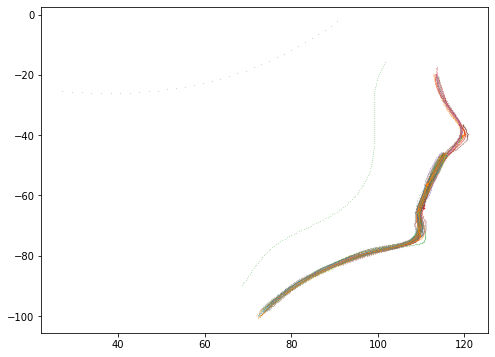

In [12]:
trajectory_vis(configs[map_list[2]], "bicycle")

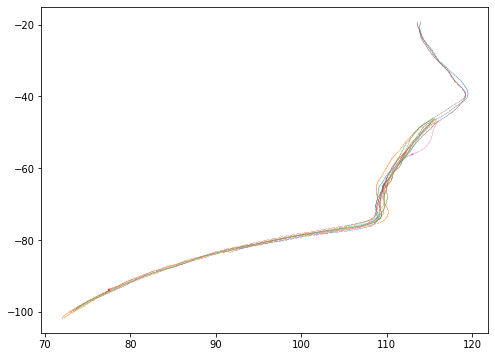

In [13]:
trajectory_vis(configs[map_list[2]], "pedestrian")

## Proportion of different agent type

In [8]:
def type_vis(map_config):
    type_set = set()
    type_count_dict = dict()
    for file_id in map_config["track_files"]:
        type_count = defaultdict(int)
        df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
        veh_ids = df["id"].unique()
        for veh_id in veh_ids:
            line_id = df[df["id"] == veh_id].index[0]
            type_count[df["type"].loc[line_id]] += 1
        type_set = type_set | set(type_count.keys())
        type_count_dict[file_id] = type_count
    df = pd.DataFrame(columns=sorted(type_set))
    i = 0
    for track_id, type_count in type_count_dict.items():
        df.at[i, "track_id"] = track_id
        total = 0
        for n in type_count.values():
            total += n
        print("There are in total %d agents in file %d" % (total, track_id))
        for type in type_set:
            df.at[i, type] = type_count[type] / total
        i += 1
    df.plot(
        x = "track_id",
        kind = "barh",
        stacked = True,
        title = map_config["map_name"],
        colormap="Set2", 
        mark_right = True)
    fig = plt.gcf()
    fig.set_size_inches((8, 0.5*len(df)))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

There are in total 348 agents in file 0


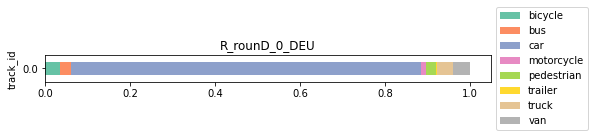

In [9]:
type_vis(configs[map_list[0]])

There are in total 269 agents in file 1


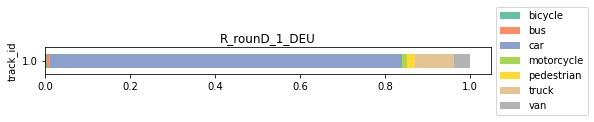

In [10]:
type_vis(configs[map_list[1]])

There are in total 406 agents in file 2
There are in total 732 agents in file 3
There are in total 710 agents in file 4
There are in total 678 agents in file 5
There are in total 770 agents in file 6
There are in total 790 agents in file 7
There are in total 619 agents in file 8
There are in total 711 agents in file 9
There are in total 697 agents in file 10
There are in total 556 agents in file 11
There are in total 522 agents in file 12
There are in total 307 agents in file 13
There are in total 577 agents in file 14
There are in total 241 agents in file 15
There are in total 309 agents in file 16
There are in total 689 agents in file 17
There are in total 707 agents in file 18
There are in total 514 agents in file 19
There are in total 779 agents in file 20
There are in total 717 agents in file 21
There are in total 634 agents in file 22
There are in total 464 agents in file 23


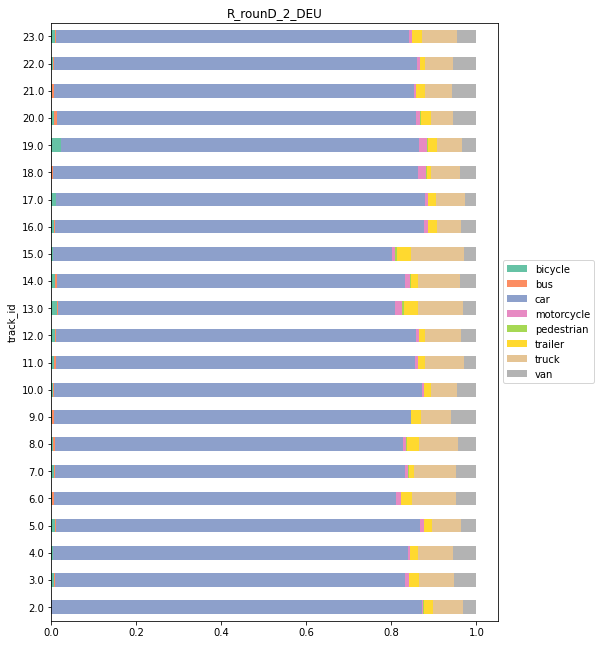

In [11]:
type_vis(configs[map_list[2]])

## Speed Distribution

In [12]:
types = ["bicycle", "bus", "car", "motorcycle", "pedestrian", "bus", "truck", "van"]

In [13]:
def speed_dist_vis1(map_config):
    for file_id in map_config["track_files"]:
        df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
        types = sorted(df["type"].unique())
        for i, type in enumerate(types):
            sns.distplot(df[(df["type"]==type) & (df["v"]>0.1)]["v"], label=type, hist=False)
            fig = plt.gcf()
            fig.set_size_inches((8,6))
            ax = plt.gca()
            ax.set_title(file_id)
        plt.set_cmap("Set2")
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

In [14]:
def speed_dist_vis2(map_config):
    global types
    for type in types:
        for file_id in map_config["track_files"]:
            df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
            sns.distplot(df[(df["type"]==type) & (df["v"]>0.1)]["v"], label=file_id, hist=False)
            fig = plt.gcf()
            fig.set_size_inches((8,6))
            ax = plt.gca()
            ax.set_title(type)
        plt.set_cmap("Set2")
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

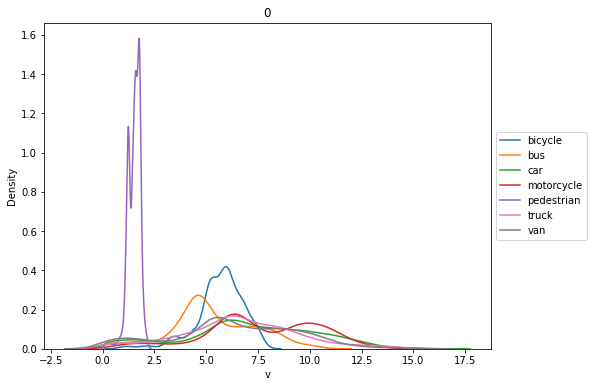

In [15]:
speed_dist_vis1(configs[map_list[0]])

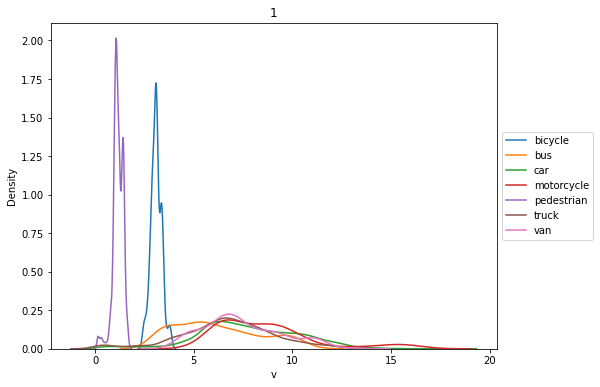

In [16]:
speed_dist_vis1(configs[map_list[1]])

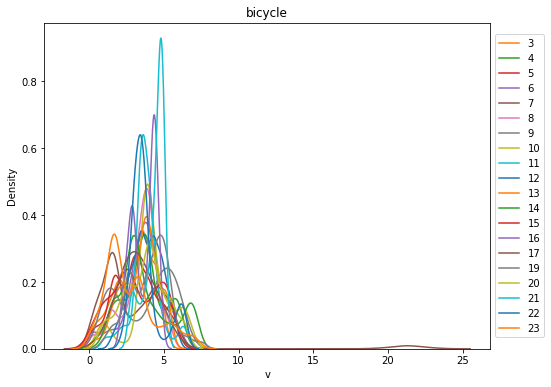

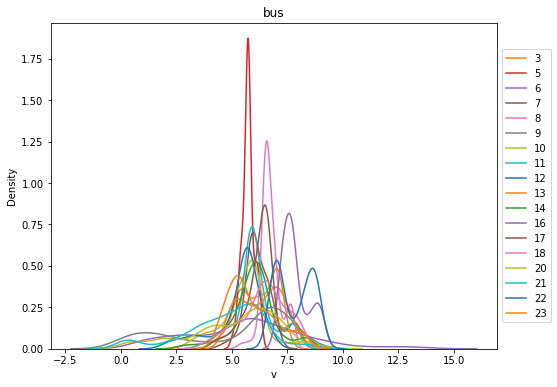

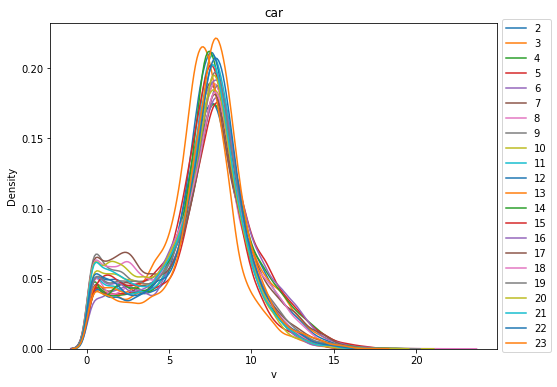

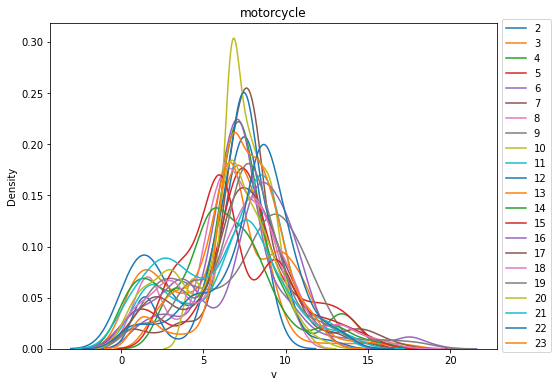

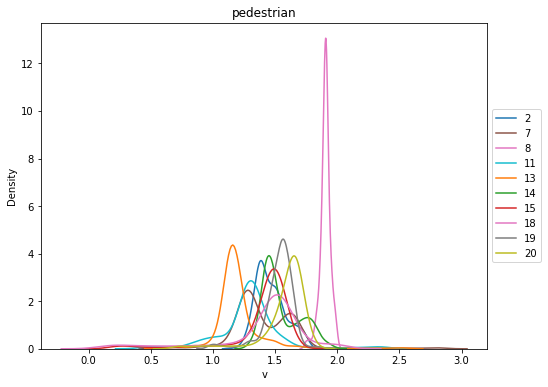

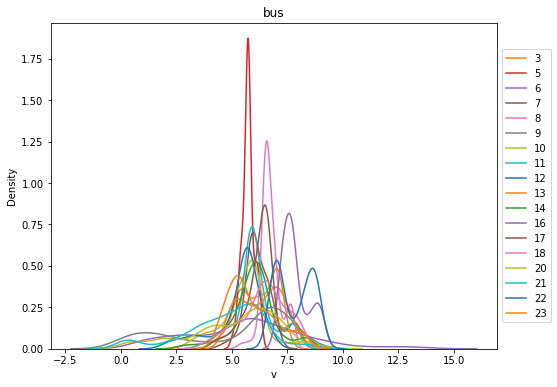

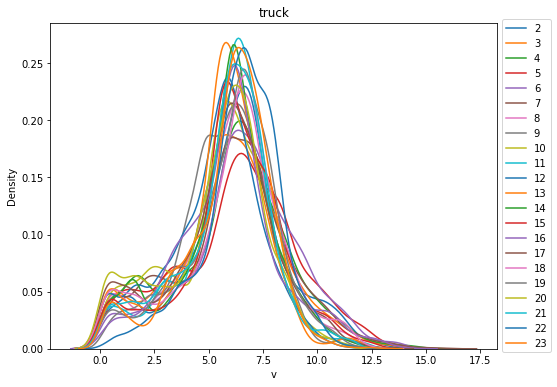

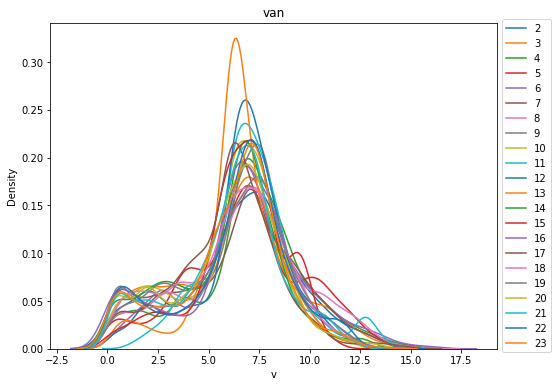

In [17]:
speed_dist_vis2(configs[map_list[2]])

## Angle Distribution

In [18]:
def angle_dist_vis(map_config, type, all_files=False):
    file_list = map_config["track_files"] if all_files else [map_config["track_files"][0]]
    for file_id in file_list:
        df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
        bin_num = 72
        theta = np.linspace(0.0, 2 * np.pi, bin_num, endpoint=False)
        angle = df[df["type"] == type]["angle"]
        for i, a in enumerate(angle):
            if a < 0:
                angle[i] = angle[i] + 2*np.pi
        radii = np.zeros(bin_num)
        for a in angle:
            radii[int(a/(2*np.pi/bin_num))] += 1
        ax = plt.subplot(111, polar=True)
        bars = ax.bar(theta, np.log10(radii), width=(2*np.pi)/bin_num, bottom=4)
        for r, bar in zip(radii, bars):
            bar.set_facecolor("turquoise")
            bar.set_alpha(0.5+0.5*r/sum(radii))
        fig = plt.gcf()
        fig.set_size_inches((6,6))
        ax = plt.gca()
        ax.set_title(file_id)
        plt.show()

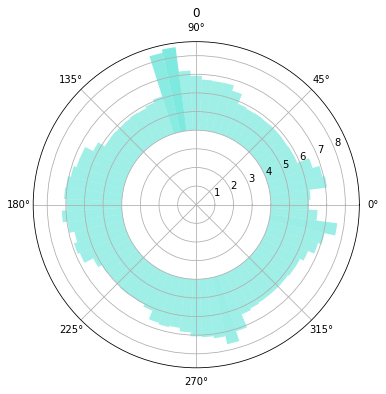

In [19]:
angle_dist_vis(configs[map_list[0]], "car")

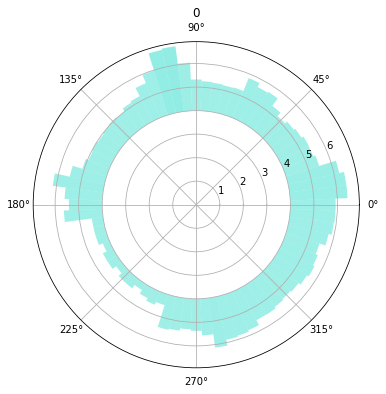

In [20]:
angle_dist_vis(configs[map_list[0]], "pedestrian")

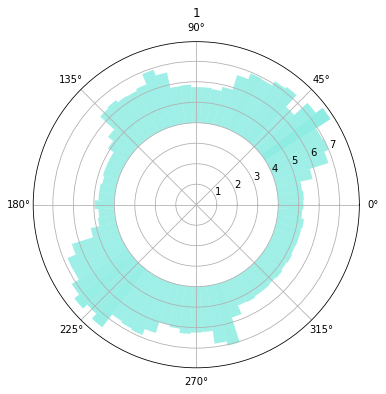

In [21]:
angle_dist_vis(configs[map_list[1]], "car")

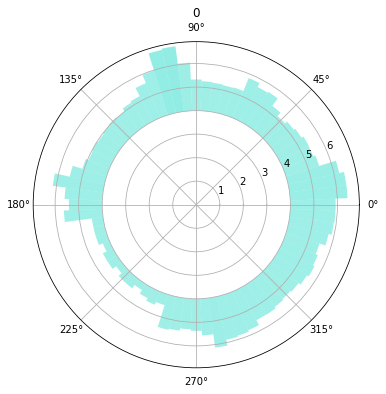

In [22]:
angle_dist_vis(configs[map_list[0]], "pedestrian")

The distribution of angle in all track files of map R_rounD_2_DEU are similar, so we only plot the first file.

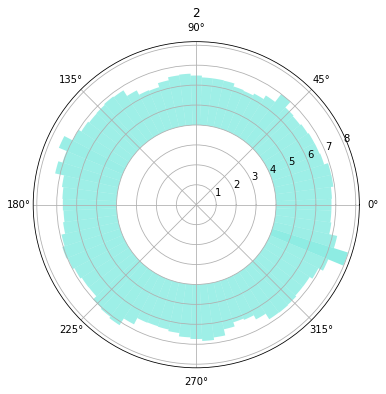

In [23]:
angle_dist_vis(configs[map_list[2]], "car")

In [24]:
def delta_angle_vis(map_config, type, all_files=False):
    file_list = map_config["track_files"] if all_files else [map_config["track_files"][0]]
    for file_id in file_list:
        df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
        df = df[df["type"]==type]
        delta_angle = []
        for veh_id in df["id"].unique():
            sub_angle_list = list(df[df["id"]==veh_id]["angle"])
            for i in range(0, len(sub_angle_list)-1):
                delta_angle.append(sub_angle_list[i+1]-sub_angle_list[i])
        sns.distplot(delta_angle, label=file_id, hist=False)
        fig = plt.gcf()
        fig.set_size_inches((8,6))
        ax = plt.gca()
        ax.set_title(type)
        ax.set_xlim(-np.pi, np.pi)
        plt.set_cmap("Set2")
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()  

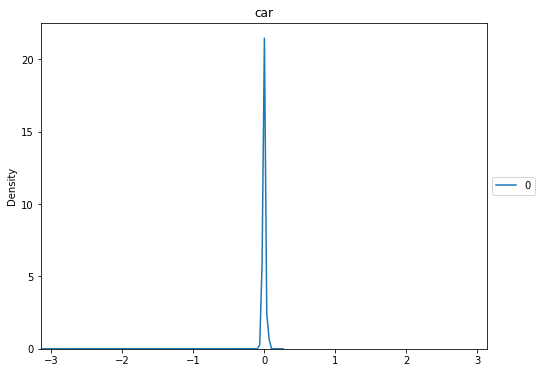

In [25]:
delta_angle_vis(configs[map_list[0]], "car")

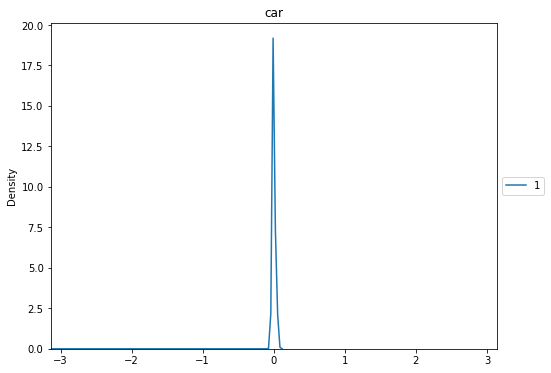

In [26]:
delta_angle_vis(configs[map_list[1]], "car")

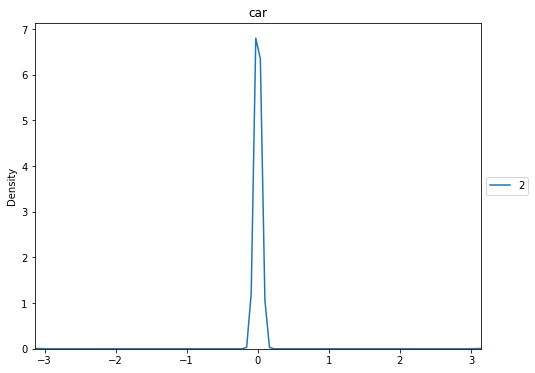

In [27]:
delta_angle_vis(configs[map_list[2]], "car")

## Traffic Density

In [28]:
def traffic_density_vis(map_config):
    for file_id in map_config["track_files"]:
        df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
        count = df.groupby(["frame", "type"]).size().unstack(level=1)
        count.plot(kind="line")
        ax = plt.gca()
        ax.set_xlim([0, 13000])
        ax.set_ylim([0, 20])
        fig = plt.gcf()
        fig.set_size_inches((8, 6))
        plt.set_cmap("Set2")
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

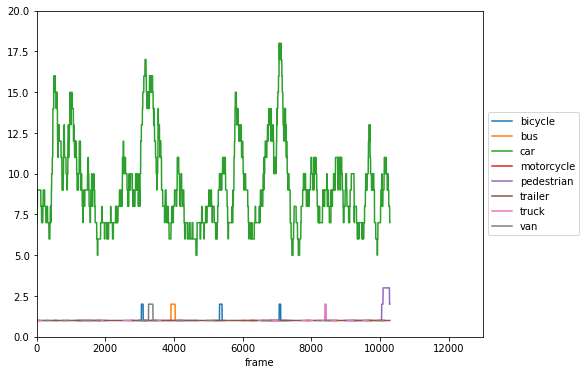

In [29]:
traffic_density_vis(configs[map_list[0]])

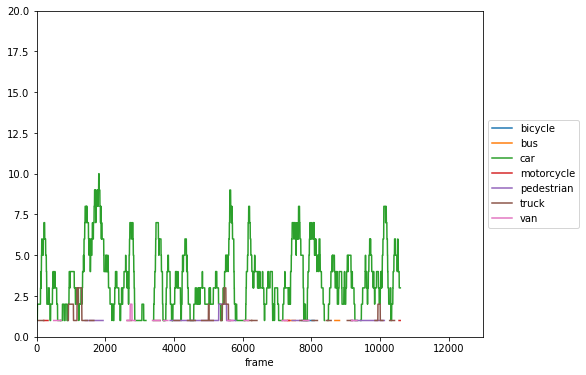

In [30]:
traffic_density_vis(configs[map_list[1]])

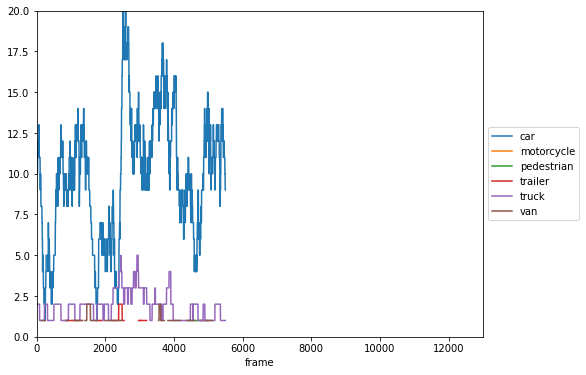

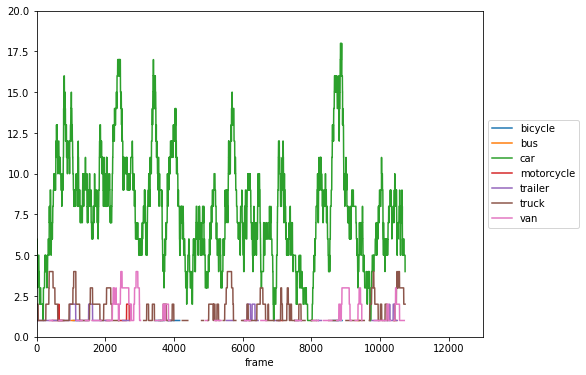

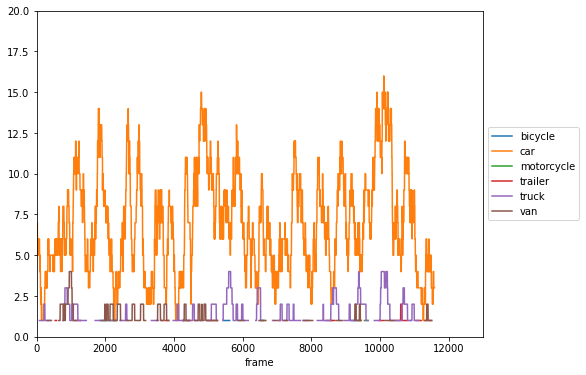

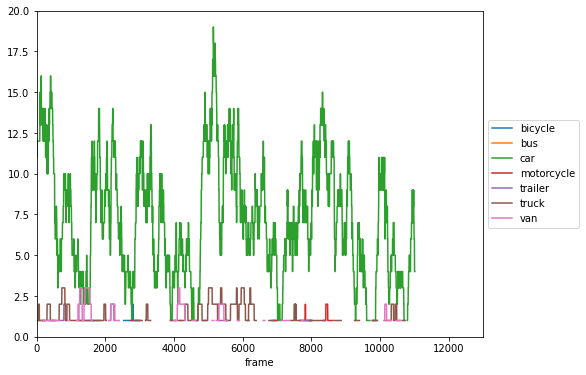

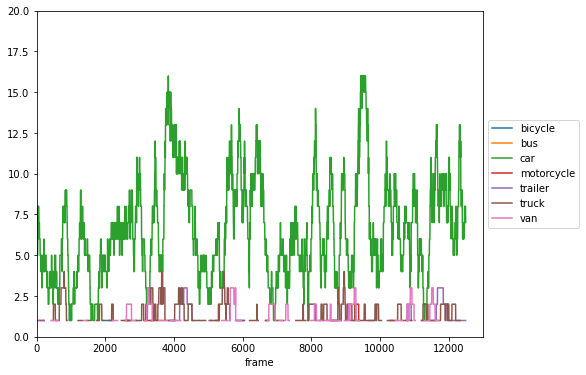

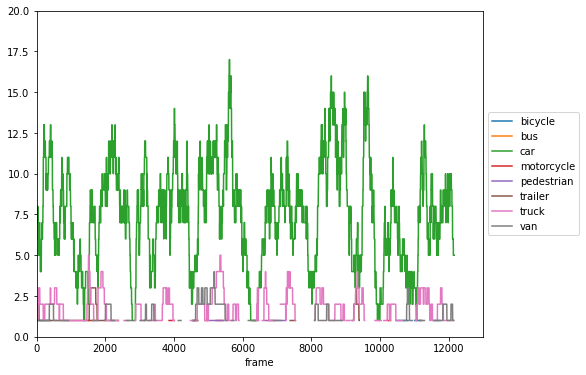

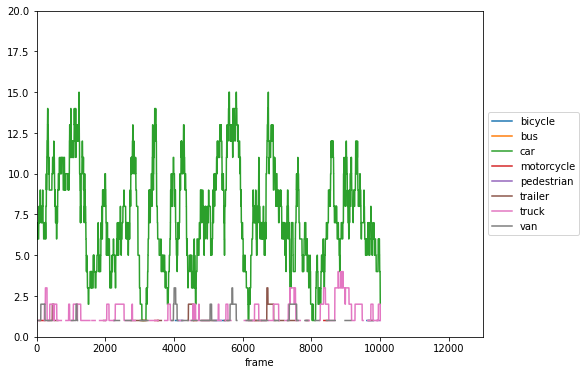

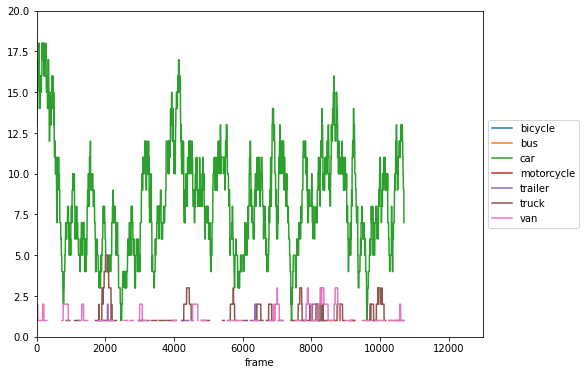

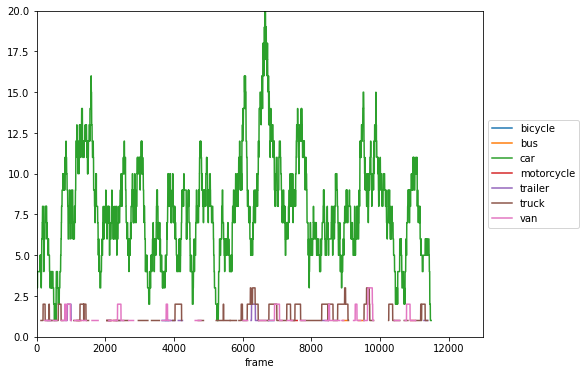

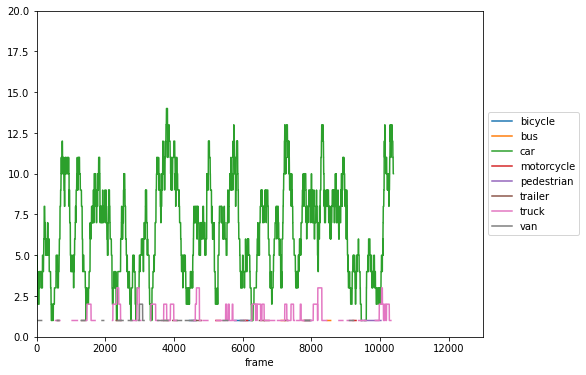

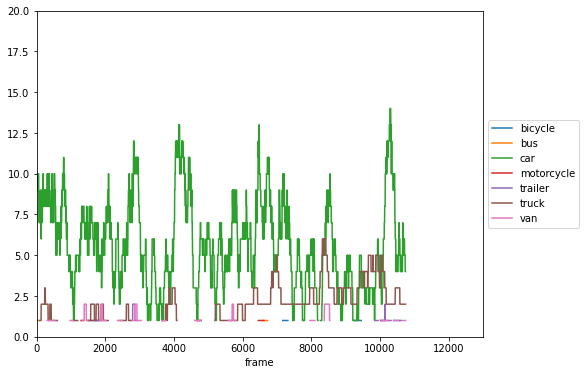

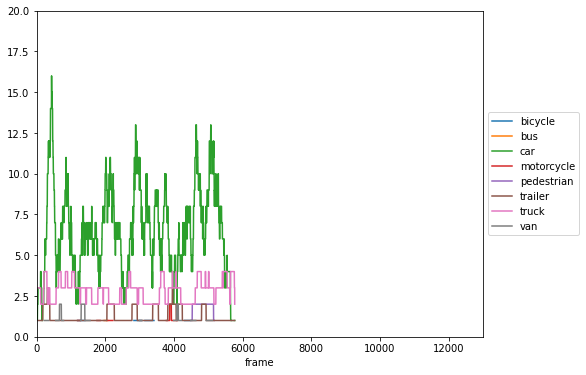

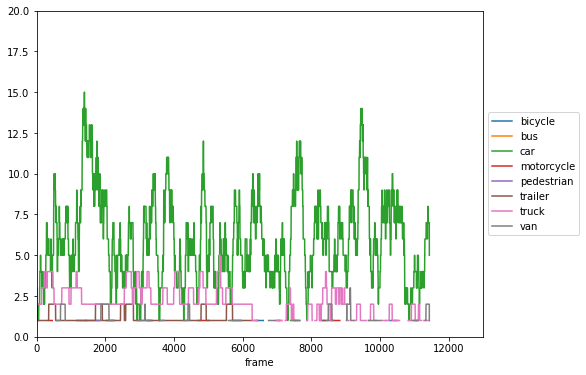

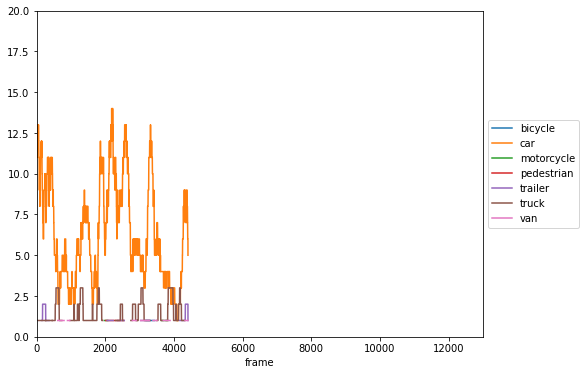

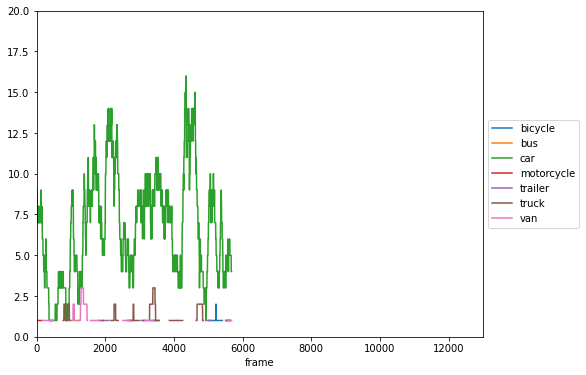

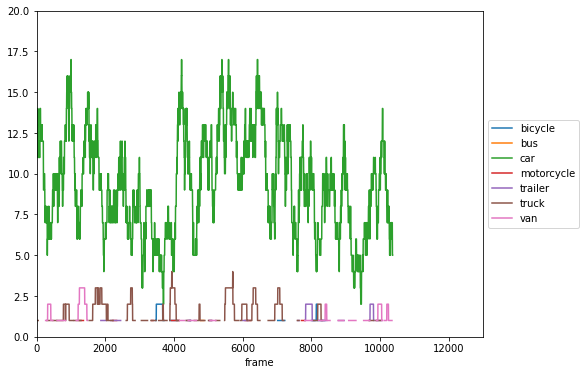

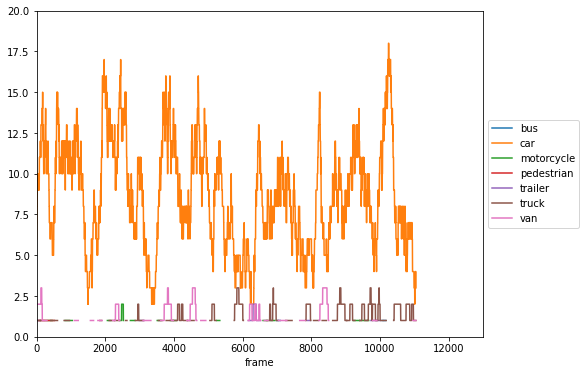

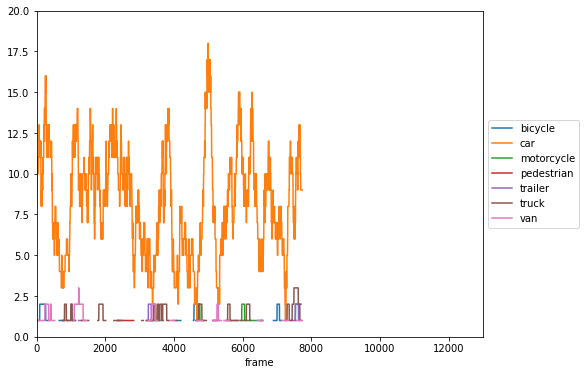

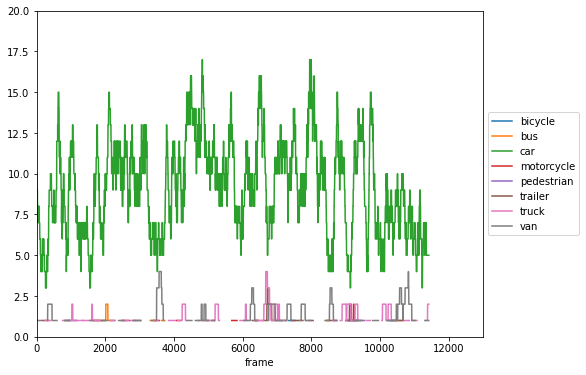

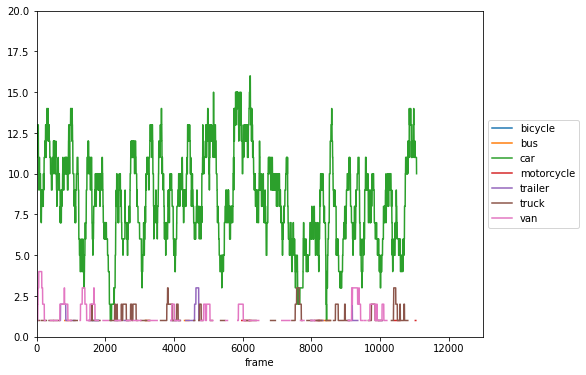

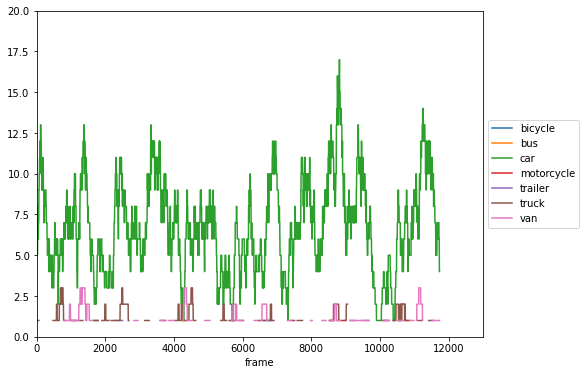

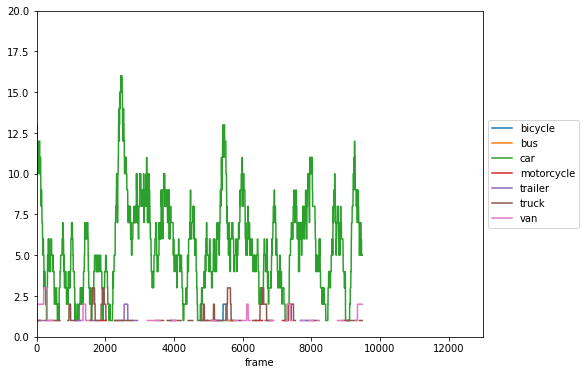

In [31]:
traffic_density_vis(configs[map_list[2]])